<font color = green>

### Home task: Neural Networks

</font>

In [1]:
# Install libraries from requirements.txt
%pip install -r "C:\Users\DELL\Documents\GitHub\Data_Science\requirements.txt"

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

cwd = os.getcwd()                 # Current working directory
path = os.path.join(cwd, 'data')  # Data directory

<font color = green>

### Brest Cancer Dataset

</font>

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset

# Load Brest Cancer dataset
X, y = load_breast_cancer(return_X_y=True)
print('X.shape =', X.shape)
print('y.shape =', y.shape)

X.shape = (569, 30)
y.shape = (569,)


In [5]:
# YOUR_CODE.  Preproces data, train classifier and evaluate the perfromance on train and test sets 
# START_CODE 

RANDOM_SEED = 42

X_train, X_test, y_train, y_test  =  train_test_split(X, y, random_state=RANDOM_SEED)

clf = MLPClassifier(random_state=RANDOM_SEED).fit(X_train, y_train)

print("train accuracy= {:.3%}".format(clf.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test, y_test)))
# END_CODE 

train accuracy= 90.376%
test accuracy= 93.007%


<font color = green>

### Signs dataset

</font>

In [6]:
# signs data set (fingers)
def load_dataset():
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes

In [7]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


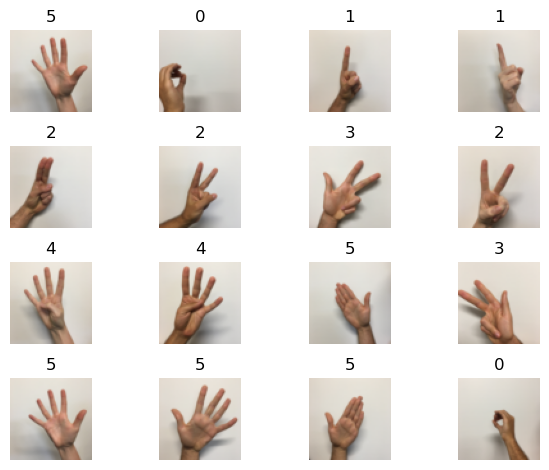

In [8]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)
    
plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

In [9]:
plt.gcf().canvas.manager.set_window_title('Train set')

<Figure size 640x480 with 0 Axes>

In [10]:
# Not in use 
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

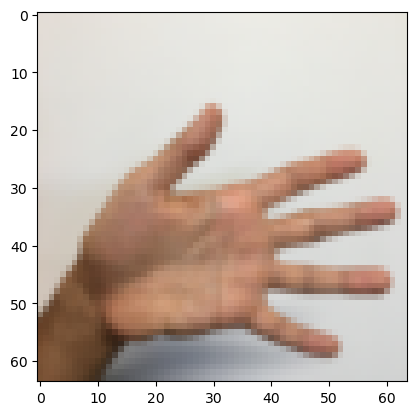

In [11]:
plt.imshow(X_train[0])

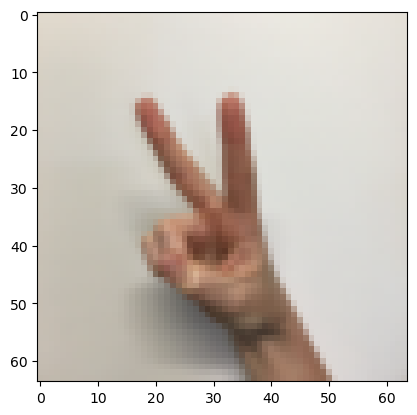

In [12]:
plt.imshow(X_train[4])

In [13]:
# YOUR_CODE.  Preproces data
# START_CODE 
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)
# END_CODE     

print ("number of training examples = " + str(X_train_scaled.shape[1]))
print ("number of test examples = " + str(X_test_scaled.shape[1]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))

print ("X_test_scaled shape: " + str(X_test_scaled.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


### Expected result 

```
number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)
```

In [14]:
# YOUR_CODE.  Train classifier and evaluate the perfromance on train and test sets 
# START_CODE 

clf = MLPClassifier(
    hidden_layer_sizes=(100, 100),
    solver='lbfgs',
    alpha=0.1,
    max_iter=500,
    random_state=0
).fit(X_train_scaled, y_train)

print("train accuracy= {:.3%}".format(clf.score(X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test_scaled, y_test)))
# END_CODE     

train accuracy= 100.000%
test accuracy= 91.667%


### Expected result 

```
train accuracy= 100.000%
test accuracy= 90.000%
```

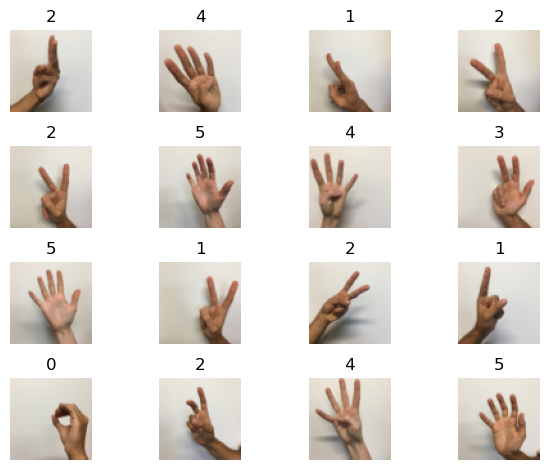

In [15]:
plt.figure()

predicted = clf.predict(X_test_scaled)

display_samples_in_grid(X_test, n_rows=4, y= predicted)

In [16]:
plt.gcf().canvas.manager.set_window_title('Test set prediction')

<Figure size 640x480 with 0 Axes>

### Compare with SVM 

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Train accuracy: {:.3%}".format(grid.score(X_train_scaled, y_train)))
print("Test accuracy: {:.3%}".format(grid.score(X_test_scaled, y_test)))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Train accuracy: 100.000%
Test accuracy: 95.000%
